/var/folders/tw/0sj1sbk54zjft6x3s_xgp0r00000gp/T/ipykernel_17756/3719341824.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


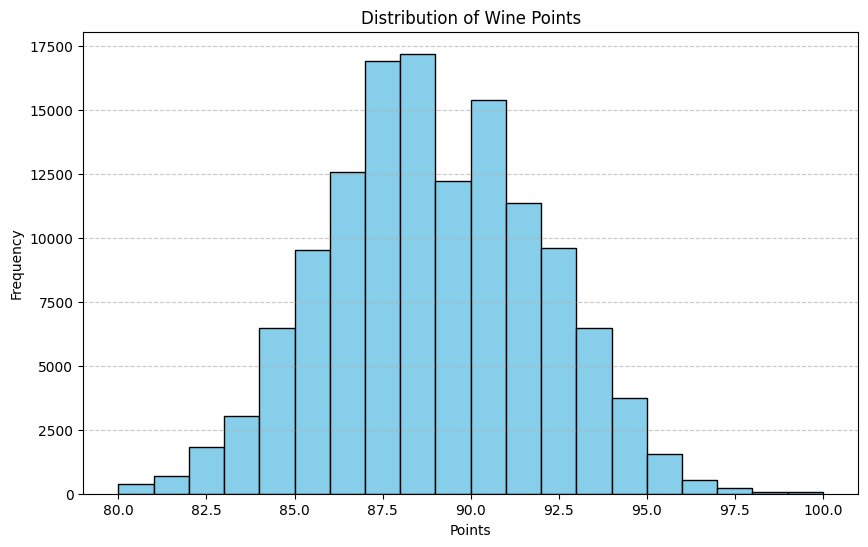

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the JSON file into a DataFrame
df = pd.read_json("../Spark/data/winemag.json")

# Plotting the distribution of points
plt.figure(figsize=(10, 6))
plt.hist(df['points'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Wine Points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


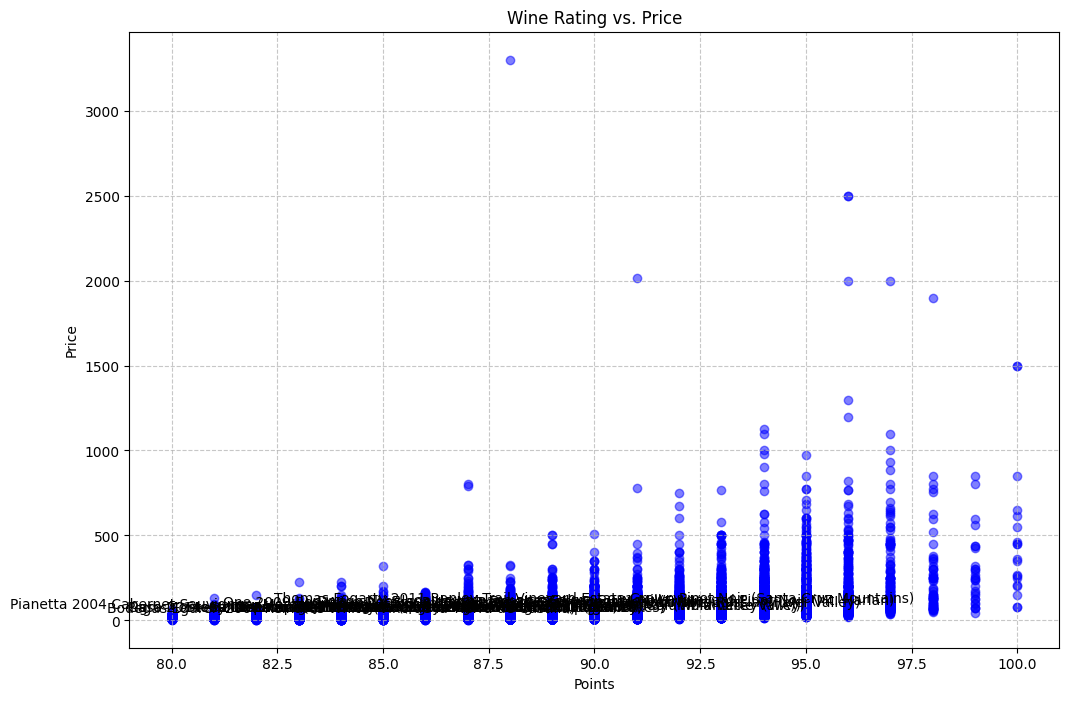

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the JSON file into a DataFrame
df = pd.read_json("../Spark/data/winemag.json")

# Selecting only rows where 'points' and 'price' are not null
filtered_df = df[['title', 'points', 'price']].dropna(subset=['points', 'price'])

# Plotting a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(filtered_df['points'], filtered_df['price'], color='blue', alpha=0.5)
plt.title('Wine Rating vs. Price')
plt.xlabel('Points')
plt.ylabel('Price')
plt.grid(True, linestyle='--', alpha=0.7)

# Adding labels for a few data points for better readability
for i in range(0, len(filtered_df), int(len(filtered_df) / 20)):
    plt.annotate(filtered_df.iloc[i]['title'], 
                 (filtered_df.iloc[i]['points'], filtered_df.iloc[i]['price']),
                 textcoords="offset points", 
                 xytext=(0, 5),
                 ha='center')

# Show the plot
plt.show()


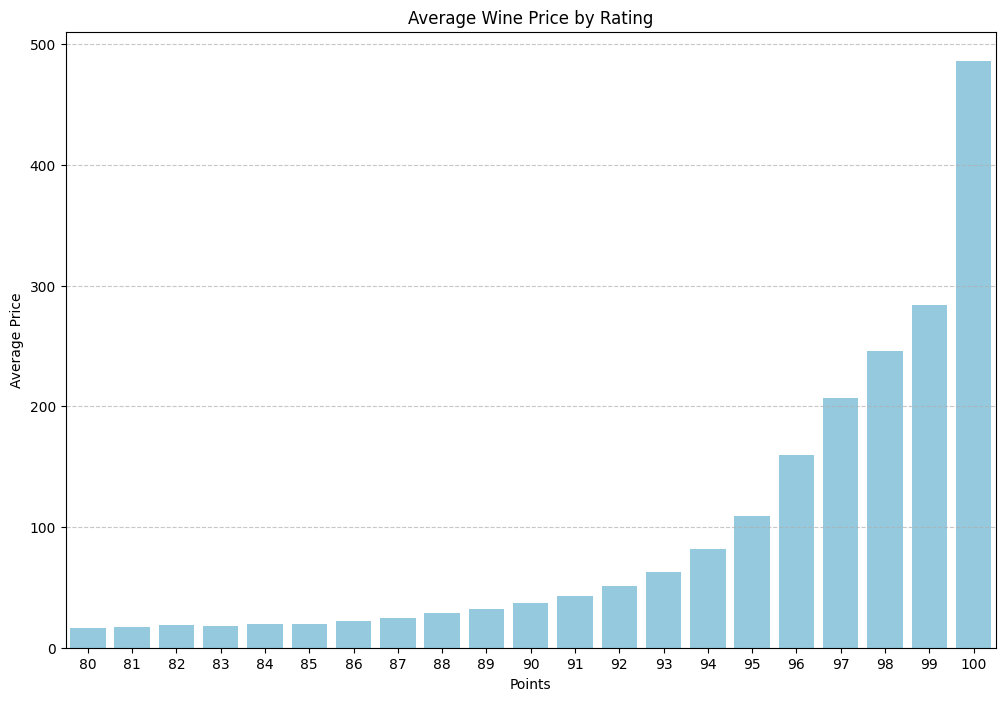

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the JSON file into a DataFrame
df = pd.read_json("../Spark/data/winemag.json")

# Selecting only rows where 'points' and 'price' are not null
filtered_df = df[['title', 'points', 'price']].dropna(subset=['points', 'price'])

# Calculate the average price for each rating
avg_price_by_rating = filtered_df.groupby('points')['price'].mean().reset_index()

# Plotting a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='points', y='price', data=avg_price_by_rating, color='skyblue')
plt.title('Average Wine Price by Rating')
plt.xlabel('Points')
plt.ylabel('Average Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [4]:
pip install seaborn


You should consider upgrading via the '/Users/saurabhpathak/Desktop/Code/pandas/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the JSON file into a DataFrame
df = pd.read_json("../Spark/data/winemag.json")

# Selecting only rows where 'points' and 'price' are not null
filtered_df = df[['title', 'points', 'price']].dropna(subset=['points', 'price'])

# Plotting a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(filtered_df['title'], filtered_df['points'], c=filtered_df['price'], cmap='viridis', alpha=0.7)
plt.title('Wine Name, Rating, and Price')
plt.xlabel('Wine Name')
plt.ylabel('Points')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.colorbar(label='Price')  # Add colorbar to indicate price
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


) missing from current font./Code/pandas/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the JSON file into a DataFrame
df = pd.read_json("../Spark/data/winemag.json")

# Selecting only rows where 'points' and 'price' are not null
filtered_df = df[['title', 'points', 'price']].dropna(subset=['points', 'price'])

# Set a threshold to limit the number of data points for better performance
threshold = 100
if len(filtered_df) > threshold:
    filtered_df = filtered_df.sample(threshold)

# Plotting a scatter plot using Seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(x='title', y='points', hue='price', data=filtered_df, palette='viridis', alpha=0.7)
plt.title('Wine Name, Rating, and Price')
plt.xlabel('Wine Name')
plt.ylabel('Points')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.colorbar(label='Price')  # Add colorbar to indicate price

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the JSON file into a DataFrame
df = pd.read_json("../Spark/data/winemag.json")

# Group by wine title and calculate the average rating and price
wine_stats = df.groupby('title').agg({'points': 'mean', 'price': 'mean'}).reset_index()

# Selecting only rows where 'points' and 'price' are not null
filtered_df = wine_stats.dropna(subset=['points', 'price'])

# Sort by rating for better visualization
filtered_df = filtered_df.sort_values(by='points', ascending=False)

# Plotting a bar plot
plt.figure(figsize=(16, 8))
sns.barplot(x='title', y='points', data=filtered_df, color='skyblue', ci=None)
plt.title('Average Wine Rating and Price')
plt.xlabel('Wine Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability

# Secondary y-axis for price
ax2 = plt.gca().twinx()
ax2.set_ylabel('Average Price', color='orange')
ax2.plot(filtered_df['title'], filtered_df['price'], color='orange', marker='o', linestyle='-', linewidth=2, markersize=8)

# Show the plot
plt.show()
